<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>CPE352 Data Science</center>
# <center>Lecture 7 - Machine Learning - Classification</center>
---

# 1. Load data

In [1]:
import pandas as pd
pd.set_option('max_columns',500)
telcoData = pd.read_csv('M1_telco.csv', na_values=' ')
telcoData.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# 2. Clean data

In [2]:
telcoData.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [3]:
telcoData.fillna(0, inplace=True)

In [4]:
telcoData.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# 3. Select relevant columns

In [5]:
telcoData.set_index('customerID', inplace=True)
telcoData.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes

# Activity: Data preparation
1. Transform categorical variable into multiple binary columns (get_dummies, drop_first)
2. Concatenate with numerical data

In [6]:
# Work here
cat_columns = telcoData.select_dtypes('object').columns
telcoData_cat = pd.get_dummies(telcoData[cat_columns],drop_first=True)
num_columns = list(set(telcoData.columns) - set(cat_columns))
telcoData_prep = pd.concat([telcoData[num_columns],telcoData_cat],axis=1)
telcoData_prep.head()

TotalCharges  SeniorCitizen  MonthlyCharges  tenure  gender_Male  \
customerID                                                                     
7590-VHVEG         29.85              0           29.85       1            0   
5575-GNVDE       1889.50              0           56.95      34            1   
3668-QPYBK        108.15              0           53.85       2            1   
7795-CFOCW       1840.75              0           42.30      45            1   
9237-HQITU        151.65              0           70.70       2            0   

            Partner_Yes  Dependents_Yes  PhoneService_Yes  \
customerID                                                  
7590-VHVEG            1               0                 0   
5575-GNVDE            0               0                 1   
3668-QPYBK            0               0                 1   
7795-CFOCW            0               0                 0   
9237-HQITU            0               0                 1   

            MultipleLines_No phone service  MultipleLines_Yes  \
customerID                                                      
7590-VHVEG                               1                  0   
5575-GNVDE                               0                  0   
3668-QPYBK                               0                  0   
7795-CFOCW                               1                  0   
9237-HQITU                               0                  0   

            InternetService_Fiber optic  InternetService_No  \
customerID                                                    
7590-VHVEG                            0                   0   
5575-GNVDE                            0                   0   
3668-QPYBK                            0                   0   
7795-CFOCW                            0                   0   
9237-HQITU                            1                   0   

            OnlineSecurity_No internet service  OnlineSecurity_Yes  \
customerID                                                           
7590-VHVEG                                   0                   0   
5575-GNVDE                                   0                   1   
3668-QPYBK                                   0                   1   
7795-CFOCW                                   0                   1   
9237-HQITU                                   0                   0   

            OnlineBackup_No internet service  OnlineBackup_Yes  \
customerID                                                       
7590-VHVEG                                 0                 1   
5575-GNVDE                                 0                 0   
3668-QPYBK                                 0                 1   
7795-CFOCW                                 0                 0   
9237-HQITU                                 0                 0   

            DeviceProtection_No internet service  DeviceProtection_Yes  \
customerID                                                               
7590-VHVEG                                     0                     0   
5575-GNVDE                                     0                     1   
3668-QPYBK                                     0                     0   
7795-CFOCW                                     0                     1   
9237-HQITU                                     0                     0   

            TechSupport_No internet service  TechSupport_Yes  \
customerID                                                     
7590-VHVEG                                0                0   
5575-GNVDE                                0                0   
3668-QPYBK                                0                0   
7795-CFOCW                                0                1   
9237-HQITU                                0                0   

            StreamingTV_No internet service  StreamingTV_Yes  \
customerID                                                     
7590-VHVEG                                0                0   
5575-GNVDE 

# Activity: Sample your data
1. Sample your data into 2 sets: 70%, 30%
2. Check distribution of churn variables. See if they are still similar to the original distribution

In [7]:
# Work here
from sklearn.model_selection import train_test_split
telcoData_train, telcoData_test  = train_test_split(telcoData_prep, test_size=0.3)

In [8]:
pd.crosstab(telcoData_train['Churn_Yes'],columns='Prob',normalize=True)

col_0        Prob
Churn_Yes        
0          0.7357
1          0.2643

In [9]:
pd.crosstab(telcoData_test['Churn_Yes'],columns='Prob',normalize=True)

col_0          Prob
Churn_Yes          
0          0.732134
1          0.267866

# 4. Train a decision tree model

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(telcoData_train.drop(columns='Churn_Yes'), 
         telcoData_train['Churn_Yes'])

DecisionTreeClassifier(min_samples_leaf=10)

# 5. Plot a decision tree

In [12]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=telcoData_train.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

# 6. Variable importance

In [13]:
pd.DataFrame(dict(Feature=telcoData_train.columns[:-1],
                  Value=tree.feature_importances_))\
  .sort_values(by='Value', ascending=False)

Feature     Value
3                                  tenure  0.302549
10            InternetService_Fiber optic  0.214877
0                            TotalCharges  0.139450
2                          MonthlyCharges  0.111440
16   DeviceProtection_No internet service  0.033632
28         PaymentMethod_Electronic check  0.032741
24                      Contract_One year  0.018827
5                             Partner_Yes  0.016175
25                      Contract_Two year  0.014990
26                   PaperlessBilling_Yes  0.014776
4                             gender_Male  0.013900
13                     OnlineSecurity_Yes  0.013484
9                       MultipleLines_Yes  0.013484
1                           SeniorCitizen  0.009965
19                        TechSupport_Yes  0.009635
21                        StreamingTV_Yes  0.007435
29             PaymentMethod_Mailed check  0.005315
15                       OnlineBackup_Yes  0.005192
27  PaymentMethod_Credit card (automatic)  0.005119
6                          Dependents_Yes  0.004880
8          MultipleLines_No phone service  0.004425
23                    StreamingMovies_Yes  0.003124
17                   DeviceProtection_Yes  0.002853
7                        PhoneService_Yes  0.001733
18        TechSupport_No internet service  0.000000
14       OnlineBackup_No internet service  0.000000
20        StreamingTV_No internet service  0.000000
12     OnlineSecurity_No internet service  0.000000
22    StreamingMovies_No internet service  0.000000
11                     InternetService_No  0.000000

# 7. Prediction

In [14]:
tree.predict(telcoData_test.drop(columns='Churn_Yes'))

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [15]:
tree.predict_proba(telcoData_test.drop(columns='Churn_Yes'))

array([[0.16666667, 0.83333333],
       [0.2       , 0.8       ],
       [0.4       , 0.6       ],
       ...,
       [1.        , 0.        ],
       [0.82352941, 0.17647059],
       [0.88888889, 0.11111111]])

# 8. Classification report

In [16]:
from sklearn.metrics import classification_report

In [17]:
res = tree.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1547
           1       0.59      0.44      0.51       566

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.77      0.76      2113



# 9. LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
lda = LinearDiscriminantAnalysis()
lda.fit(telcoData_train.drop(columns='Churn_Yes'), telcoData_train['Churn_Yes'])

LinearDiscriminantAnalysis()

In [20]:
pd.DataFrame(dict(Feature = telcoData_train.columns[:-1],
                  Coefficient = lda.coef_[0]))

Feature  Coefficient
0                            TotalCharges    -0.000318
1                           SeniorCitizen     0.476264
2                          MonthlyCharges    -0.003255
3                                  tenure    -0.014053
4                             gender_Male    -0.076606
5                             Partner_Yes    -0.075107
6                          Dependents_Yes    -0.075886
7                        PhoneService_Yes    -0.075156
8          MultipleLines_No phone service     0.075156
9                       MultipleLines_Yes     0.321517
10            InternetService_Fiber optic     1.286980
11                     InternetService_No    -0.178350
12     OnlineSecurity_No internet service    -0.178350
13                     OnlineSecurity_Yes    -0.358749
14       OnlineBackup_No internet service    -0.178350
15                       OnlineBackup_Yes    -0.147717
16   DeviceProtection_No internet service    -0.178350
17                   DeviceProtection_Yes    -0.035505
18        TechSupport_No internet service    -0.178350
19                        TechSupport_Yes    -0.381371
20        StreamingTV_No internet service    -0.178350
21                        StreamingTV_Yes     0.453244
22    StreamingMovies_No internet service    -0.178350
23                    StreamingMovies_Yes     0.430325
24                      Contract_One year    -0.708011
25                      Contract_Two year    -0.488502
26                   PaperlessBilling_Yes     0.281293
27  PaymentMethod_Credit card (automatic)     0.012401
28         PaymentMethod_Electronic check     0.541611
29             PaymentMethod_Mailed check    -0.063155

# 10. Predicting with LDA

In [21]:
res_lda = lda.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res_lda))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1547
           1       0.63      0.54      0.58       566

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



# 11. Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
lr.fit(telcoData_train.drop(columns='Churn_Yes'), telcoData_train['Churn_Yes'])

LogisticRegression()

# 12. Coefficient

In [24]:
pd.DataFrame(dict(Feature = telcoData_train.columns[:-1],
                  Coefficient = lr.coef_[0]))

Feature  Coefficient
0                            TotalCharges     0.000340
1                           SeniorCitizen     0.368416
2                          MonthlyCharges     0.005387
3                                  tenure    -0.066406
4                             gender_Male    -0.057514
5                             Partner_Yes    -0.070983
6                          Dependents_Yes    -0.207197
7                        PhoneService_Yes    -0.256429
8          MultipleLines_No phone service     0.103720
9                       MultipleLines_Yes     0.182473
10            InternetService_Fiber optic     0.405133
11                     InternetService_No    -0.133013
12     OnlineSecurity_No internet service    -0.133013
13                     OnlineSecurity_Yes    -0.481841
14       OnlineBackup_No internet service    -0.133013
15                       OnlineBackup_Yes    -0.223614
16   DeviceProtection_No internet service    -0.133013
17                   DeviceProtection_Yes    -0.179075
18        TechSupport_No internet service    -0.133013
19                        TechSupport_Yes    -0.509682
20        StreamingTV_No internet service    -0.133013
21                        StreamingTV_Yes     0.099720
22    StreamingMovies_No internet service    -0.133013
23                    StreamingMovies_Yes     0.084187
24                      Contract_One year    -0.211074
25                      Contract_Two year    -0.371157
26                   PaperlessBilling_Yes     0.345693
27  PaymentMethod_Credit card (automatic)    -0.148721
28         PaymentMethod_Electronic check     0.432548
29             PaymentMethod_Mailed check    -0.284387

# 13. Prediction and evaluation

In [25]:
res_lr = lr.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res_lr))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1547
           1       0.63      0.50      0.56       566

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



# Lab - Heart Disease

## Task
Build ML model to classify patients with heart disease.
## Due Date
19 October 2020
Submit the PDF file of this notebook to LEB2
## Data
Data is in the file "heart.csv"
### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient, 0 for not present and 1 for present.

### Content

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 for normal, 1 for heart disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Reference: https://www.kaggle.com/ronitf/heart-disease-uci

## Load data

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heartdata = pd.read_csv('heart.csv')
heartdata.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## Exploratory Data Analysis

In [46]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
heartdata.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0.5, 1.0, 'Data: Correlations between Variables')

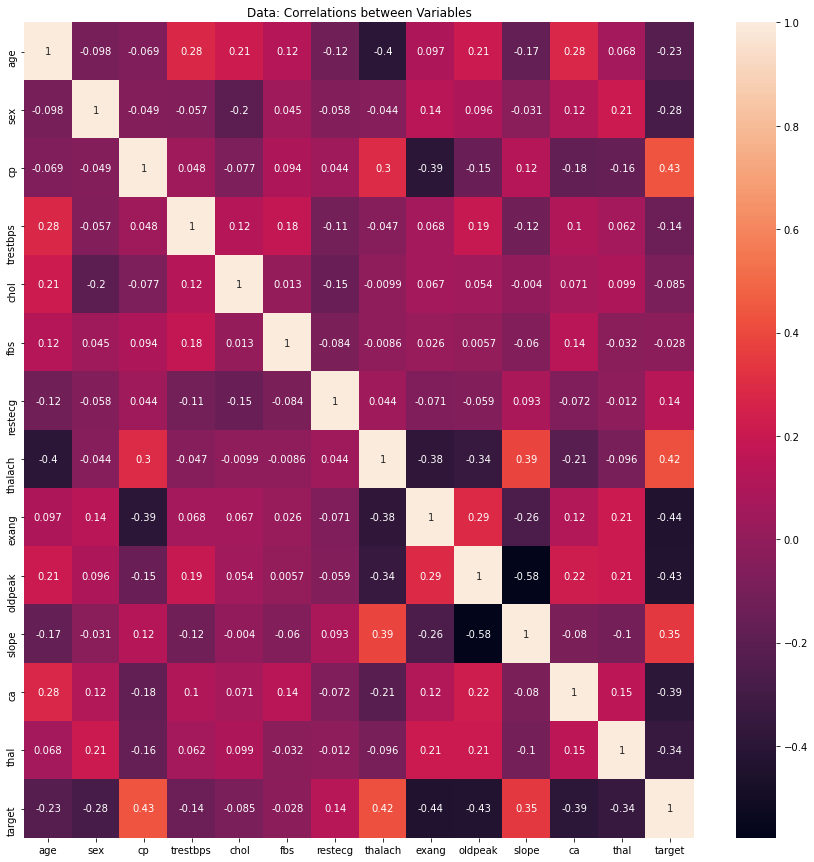

In [29]:
corr_matrix = heartdata.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, square=False, fmt=".2g")
plt.title("Data: Correlations between Variables")

## Data preparation

1. Transform categorical variable 
2. Concatenate with numerical data

In [31]:
heartdata_cat = heartdata[['sex','cp','fbs','restecg','exang','thal']].applymap(str)
heartdata_num = heartdata.drop(columns=heartdata_cat)
heartdata_dum = pd.get_dummies(heartdata_cat,drop_first=True)
heartdata_prepa = pd.concat([heartdata_dum,heartdata_num],axis=1)
heartdata_prepa

sex_1  cp_1  cp_2  cp_3  fbs_1  restecg_1  restecg_2  exang_1  thal_1  \
0        1     0     0     1      1          0          0        0       1   
1        1     0     1     0      0          1          0        0       0   
2        0     1     0     0      0          0          0        0       0   
3        1     1     0     0      0          1          0        0       0   
4        0     0     0     0      0          1          0        1       0   
..     ...   ...   ...   ...    ...        ...        ...      ...     ...   
298      0     0     0     0      0          1          0        1       0   
299      1     0     0     1      0          1          0        0       0   
300      1     0     0     0      1          1          0        0       0   
301      1     0     0     0      0          1          0        1       0   
302      0     1     0     0      0          0          0        0       0   

     thal_2  thal_3  age  trestbps  chol  thalach  oldpeak  slope  ca  target  
0         0       0   63       145   233      150      2.3      0   0       1  
1         1       0   37       130   250      187      3.5      0   0       1  
2         1       0   41       130   204      172      1.4      2   0       1  
3         1       0   56       120   236      178      0.8      2   0       1  
4         1       0   57       120   354      163      0.6      2   0       1  
..      ...     ...  ...       ...   ...      ...      ...    ...  ..     ...  
298       0       1   57       140   241      123      0.2      1   0       0  
299       0       1   45       110   264      132      1.2      1   0       0  
300       0       1   68       144   193      141      3.4      1   2       0  
301       0       1   57       130   131      115      1.2      1   1       0  
302       1       0   57       130   236      174      0.0      1   1       0  

[303 rows x 19 columns]

## Sample  data into 2 sets: 70%, 30%

In [32]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(heartdata_prepa,test_size=0.3)

## Check distribution

In [33]:
pd.crosstab(train['target'],columns='prob',normalize=True)

col_0       prob
target          
0       0.448113
1       0.551887

In [34]:
pd.crosstab(test['target'],columns='prob',normalize=True)

col_0       prob
target          
0       0.472527
1       0.527473

## Decision tree model

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(train.drop(columns='target'),train['target'])

DecisionTreeClassifier(min_samples_leaf=10)

In [36]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=train.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

In [37]:
pd.DataFrame(dict(Feature=train.columns[:-1],
                  Value=tree.feature_importances_))\
    .sort_values(by='Value', ascending=False)

Feature     Value
9      thal_2  0.509597
17         ca  0.138700
15    oldpeak  0.100464
13       chol  0.076188
16      slope  0.075795
0       sex_1  0.037910
12   trestbps  0.028141
14    thalach  0.023015
11        age  0.010190
2        cp_2  0.000000
3        cp_3  0.000000
4       fbs_1  0.000000
5   restecg_1  0.000000
6   restecg_2  0.000000
7     exang_1  0.000000
8      thal_1  0.000000
1        cp_1  0.000000
10     thal_3  0.000000

### Prediction and Evaluation of decision tree model

In [38]:
res = tree.predict(test.drop(columns='target'))
print(classification_report(y_true=test['target'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        43
           1       0.77      0.75      0.76        48

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



## LDA model

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(train.drop(columns='target'), train['target'])

LinearDiscriminantAnalysis()

In [40]:
pd.DataFrame(dict(Feature = train.columns[:-1],
                  Coefficient = lda.coef_[0]))

Feature  Coefficient
0       sex_1    -1.397679
1        cp_1     2.242821
2        cp_2     2.598439
3        cp_3     1.999243
4       fbs_1     0.505929
5   restecg_1     0.772319
6   restecg_2    -0.561170
7     exang_1    -1.087745
8      thal_1     1.094587
9      thal_2     2.874500
10     thal_3    -0.057653
11        age    -0.000239
12   trestbps    -0.025164
13       chol    -0.002086
14    thalach     0.015621
15    oldpeak    -0.360510
16      slope     0.464652
17         ca    -0.837373

### Prediction and Evaluation of LDA model

In [41]:
res_lda = lda.predict(test.drop(columns='target'))
print(classification_report(y_true=test['target'].values, y_pred=res_lda))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        43
           1       0.80      0.83      0.82        48

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



## Logistic regression model

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train.drop(columns='target'), train['target'])

C:\Users\win10x64\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
pd.DataFrame(dict(Feature = train.columns[:-1],
                  Coefficient = lr.coef_[0]))

Feature  Coefficient
0       sex_1    -0.827968
1        cp_1     0.747990
2        cp_2     1.325946
3        cp_3     0.483939
4       fbs_1     0.256044
5   restecg_1     0.749757
6   restecg_2    -0.022607
7     exang_1    -1.001285
8      thal_1     0.008327
9      thal_2     1.018253
10     thal_3    -0.906747
11        age     0.012724
12   trestbps    -0.023503
13       chol    -0.002427
14    thalach     0.022693
15    oldpeak    -0.345941
16      slope     0.335794
17         ca    -0.697618

### Prediction and Evaluation of Logistic regression model

In [44]:
res_lr = lr.predict(test.drop(columns='target'))
print(classification_report(y_true=test['target'].values, y_pred=res_lr))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        43
           1       0.80      0.83      0.82        48

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

